# Adult Salary Prediction

In [153]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [154]:
df = pd.read_csv(r"D:\ML Projects\Day 1\adult_data.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [155]:
df.shape

(32561, 15)

In [156]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

## Details

age: The age of the individual in years.

workclass: The category of employment of the individual (e.g., Private, Self-Employed, Government, etc.).

fnlwgt (Final Weight): A demographic weight assigned to the individual by the Census Bureau to represent the number of people the individual represents in the population.

education: The highest level of education achieved by the individual (e.g., Bachelors, Masters, Doctorate).

education-num: Numeric representation of education corresponding to the number of years of education completed.

marital-status: The marital status of the individual (e.g., Married, Divorced, Never-married).

occupation: The type of occupation the individual is engaged in (e.g., Managerial, Administrative, Clerical).

relationship: Indicates the relationship of the individual to the household (e.g., Husband, Wife, Not-in-family).

race: The race of the individual (e.g., White, Black, Asian-Pac-Islander).

sex: The gender of the individual (Male or Female).

capital-gain: Income from investment sources, excluding salary and wages.

capital-loss: Losses incurred from investment sources.

hours-per-week: The average number of hours the individual works per week.

native-country: The country of origin of the individual.

salary: The income category of the individual, often expressed as ">50K" or "<=50K" indicating whether the individual earns more or less than $50,000 per year.

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [158]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [159]:
# Checking missing values
df.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

In [160]:
# Dividing features into Numerical Features and Categorical features
Numerical = df.select_dtypes(include=np.number).columns.to_list()
Categorical = df.select_dtypes(exclude=np.number).columns.to_list()


In [161]:
Numerical

['age',
 ' fnlwgt',
 ' education-num',
 ' capital-gain',
 ' capital-loss',
 ' hours-per-week']

In [162]:
Categorical

[' workclass',
 ' education',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' native-country',
 ' salary']

In [163]:
df[' capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

In [164]:
df[' capital-gain'].value_counts()

 capital-gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
6097         1
1639         1
7978         1
2387         1
5060         1
Name: count, Length: 119, dtype: int64

In [165]:
df[' capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

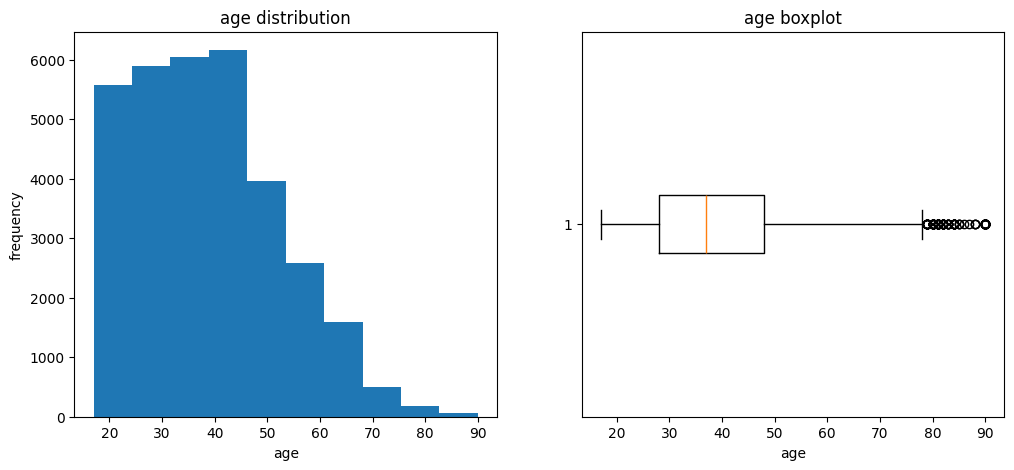

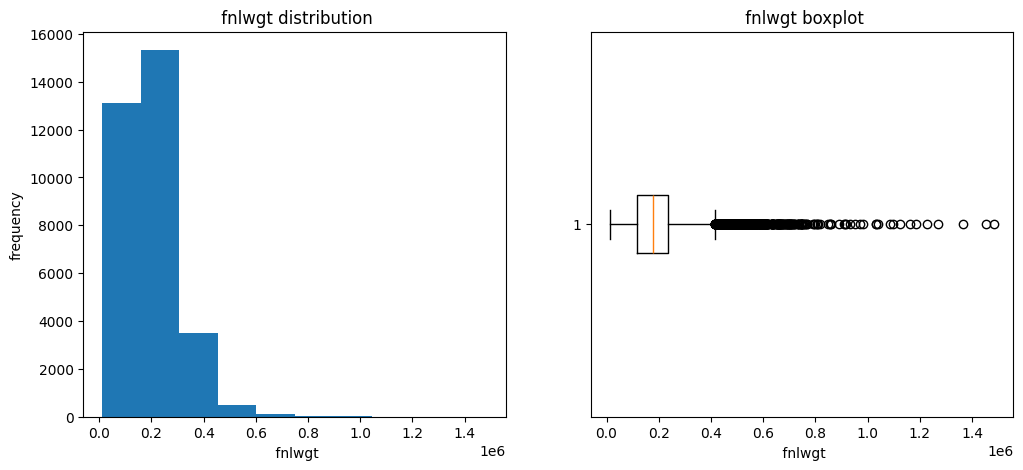

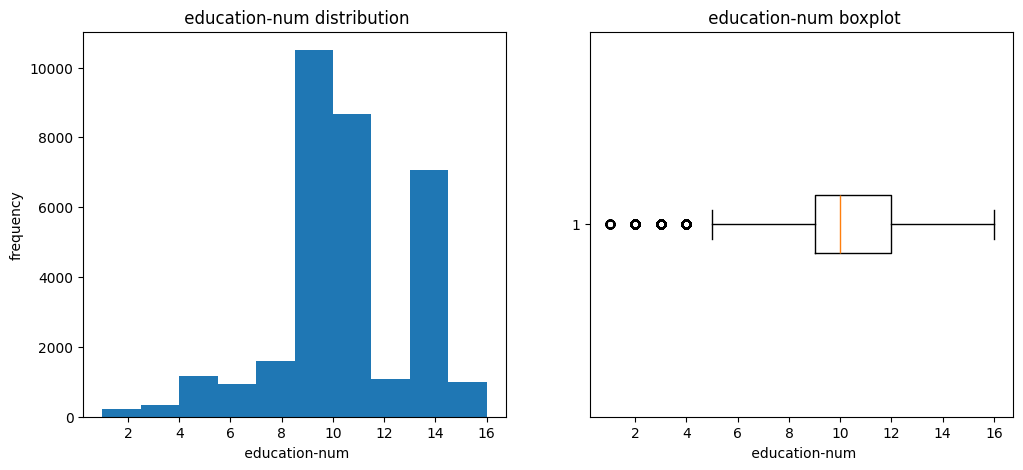

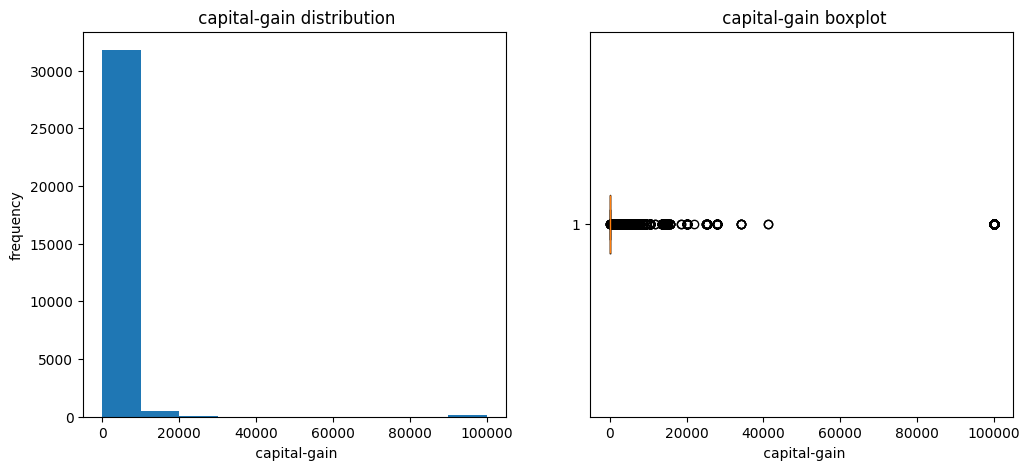

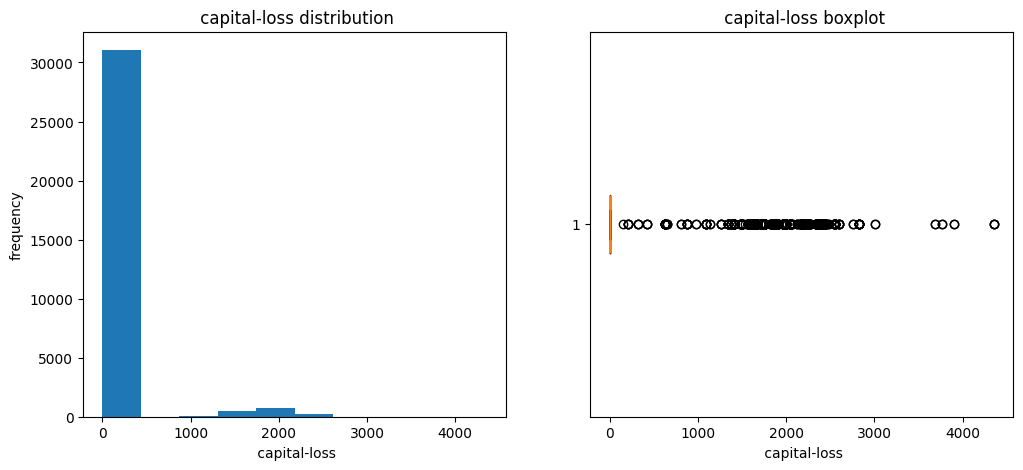

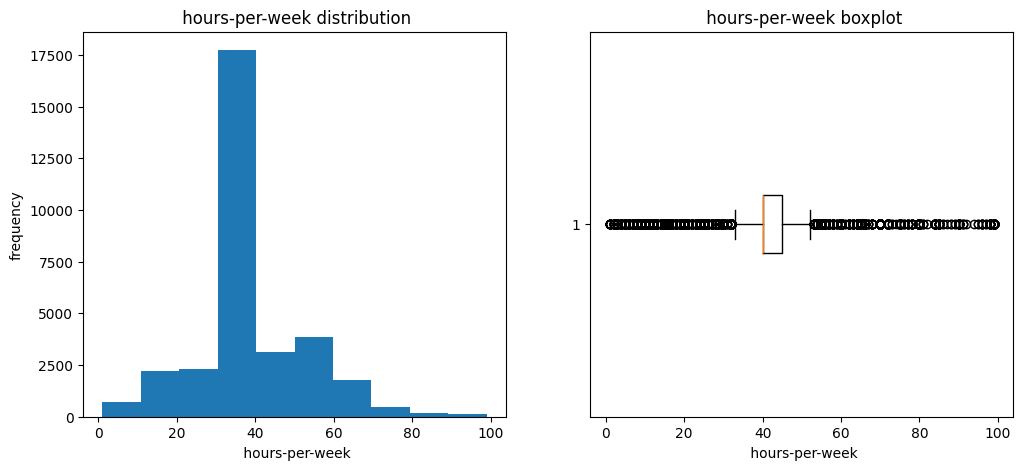

In [166]:
# Data Visualization and Outlier detection
for i in Numerical:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.title(i +" distribution")
    plt.hist(df[i])

    plt.subplot(1,2,2)
    plt.title(i+' boxplot')
    plt.xlabel(i)
    plt.boxplot(df[i],vert=False)


In [167]:
# Outlier-Treatment
# 1. using SD
# UpperLimit = df[i].mean() + df[i].std()*3
# LowerLimit = df[i].mean() - df[i].std()*3
# 2. using percenticle
# UpperLimit = df[i].quantile(.97)
# LowerLimit = df[i].quantile(.05)

In [168]:
for i in Numerical:
    print(df[i])

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 32561, dtype: int64
0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name:  fnlwgt, Length: 32561, dtype: int64
0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name:  education-num, Length: 32561, dtype: int64
0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name:  capital-gain, Length: 32561, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name:  capital-loss, Length: 32561, dtype: int64
0        40
1        13
2        40
3       

In [169]:
for i in ['age',' fnlwgt',' education-num',' hours-per-week']:
    q1,q3 = np.percentile(df[i],[25,75])
    iqr = q3 - q1
    uw = q3 + 1.5*iqr
    lw = q1 -1.5*iqr
    df[i] = np.where(df[i] > uw,uw,df[i])
    df[i] = np.where(df[i] < lw,lw,df[i])
    

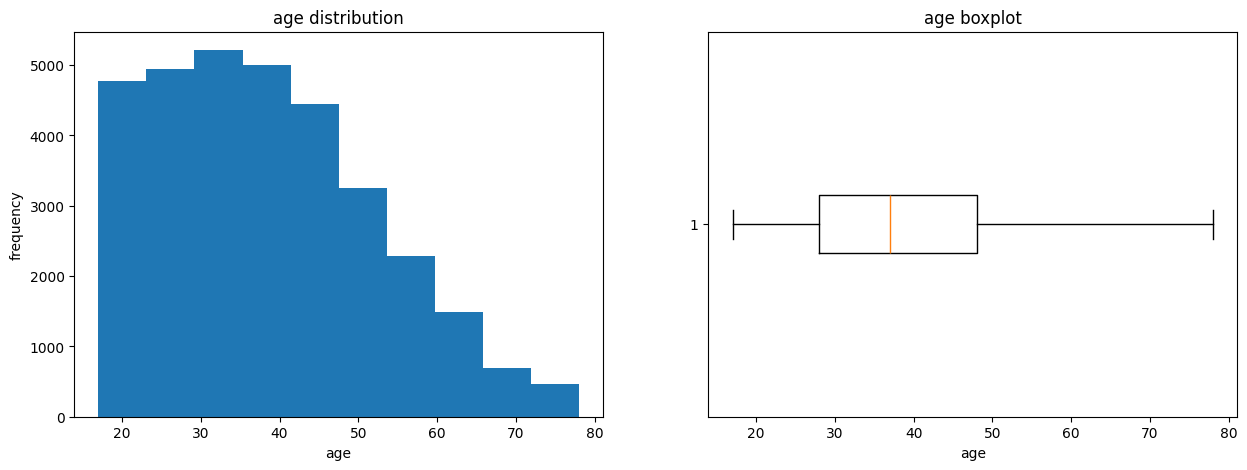

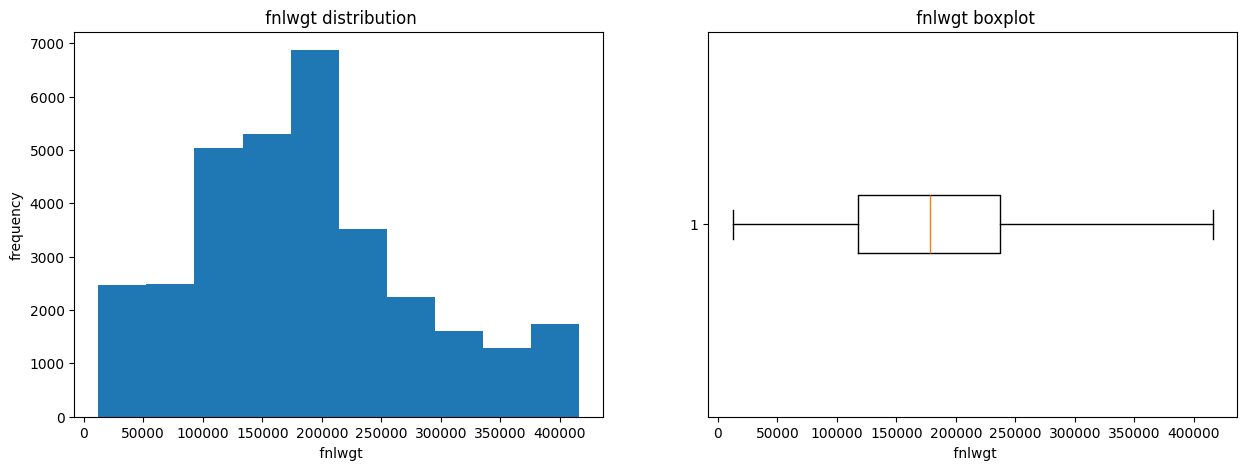

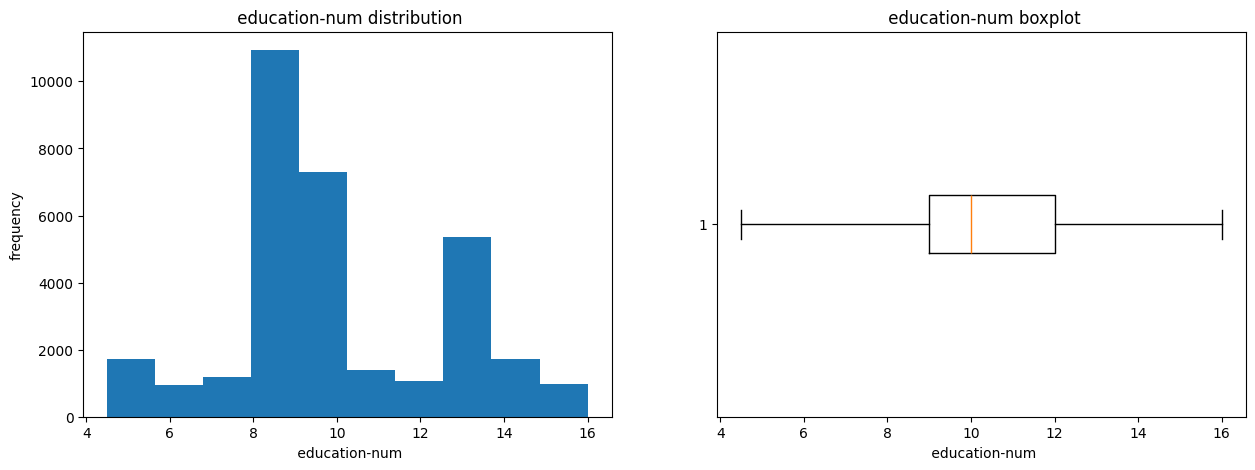

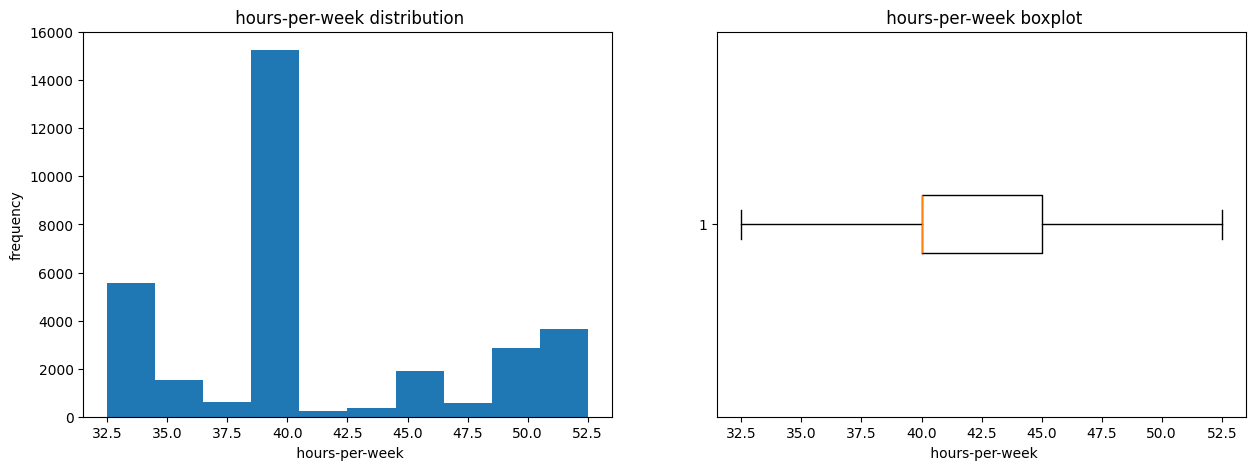

In [170]:
# Data Visualization and Outlier detection
for i in ['age',' fnlwgt',' education-num',' hours-per-week']:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.xlabel(i)
    plt.ylabel('frequency')
    plt.title(i +" distribution")
    plt.hist(df[i])

    plt.subplot(1,2,2)
    plt.title(i+' boxplot')
    plt.xlabel(i)
    plt.boxplot(df[i],vert=False)


In [171]:
# Categorical variables Visualization
Categorical

[' workclass',
 ' education',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' native-country',
 ' salary']

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


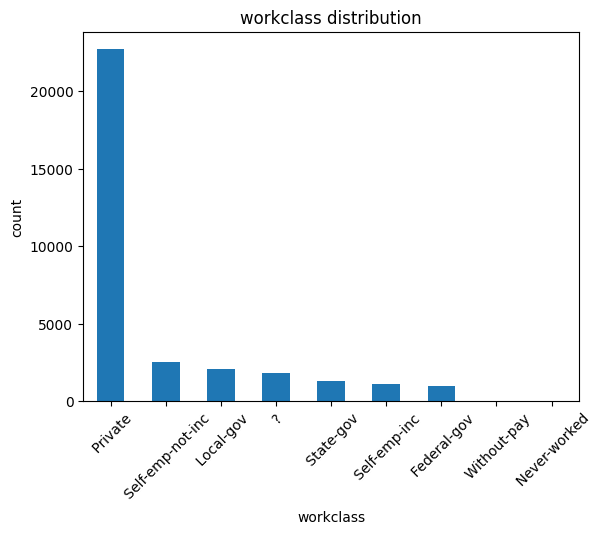

In [172]:
print(df[' workclass'].unique())
print(df[' workclass'].value_counts())
df[' workclass'].value_counts().plot(kind='bar')
plt.xlabel('workclass')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.title('workclass distribution')
plt.show()

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


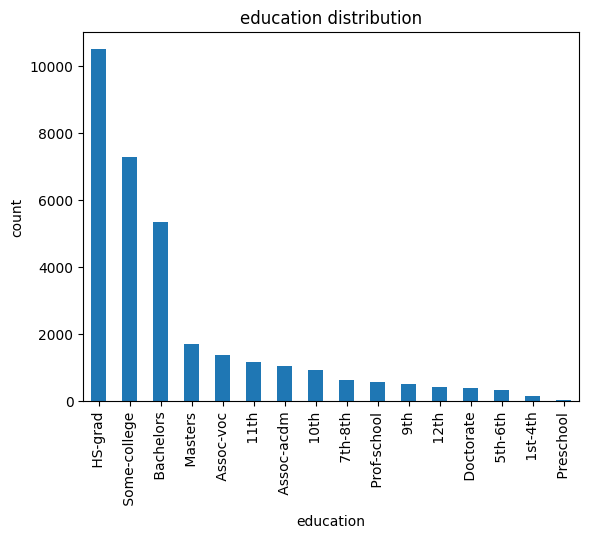

In [173]:
print(df[' education'].unique())
print(df[' education'].value_counts())
df[' education'].value_counts().plot(kind='bar')
plt.xlabel("education")
plt.ylabel('count')
plt.title('education distribution')
#plt.xticks(rotation=45)
plt.show()

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
 marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64


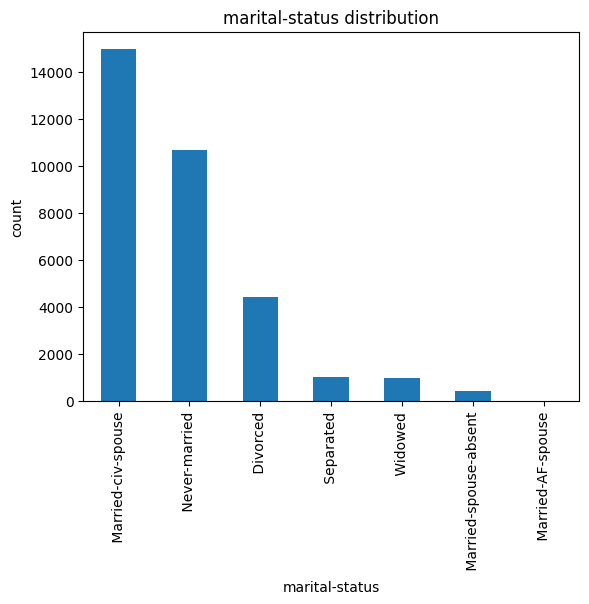

In [174]:
print(df[' marital-status'].unique())
print(df[' marital-status'].value_counts())
df[' marital-status'].value_counts().plot(kind='bar')
plt.xlabel('marital-status')
plt.ylabel('count')
plt.title('marital-status distribution')
#plt.xticks(rotation=45)
plt.show()

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
 occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64


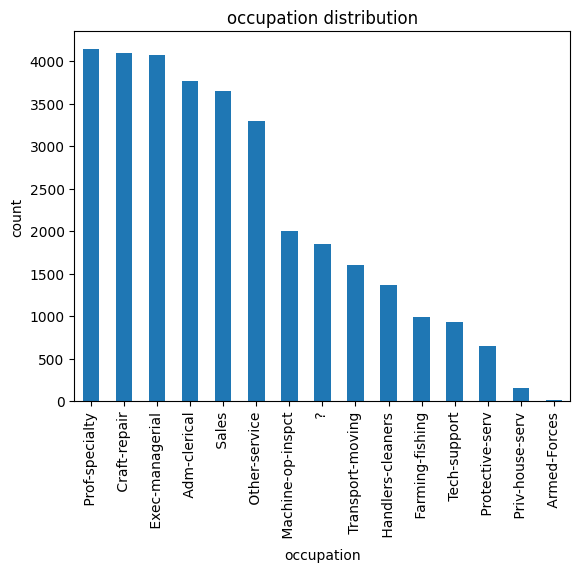

In [175]:
print(df[' occupation'].unique())
print(df[' occupation'].value_counts())
df[' occupation'].value_counts().plot(kind='bar')
plt.xlabel('occupation')
plt.ylabel('count')
plt.title('occupation distribution')
#plt.xticks(rotation=45)
plt.show()

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
 relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64


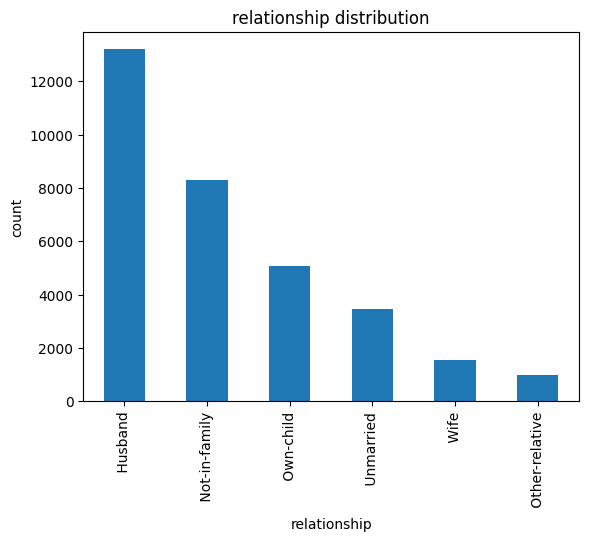

In [176]:
print(df[' relationship'].unique())
print(df[' relationship'].value_counts())
df[' relationship'].value_counts().plot(kind='bar')
plt.xlabel('relationship')
plt.ylabel('count')
plt.title('relationship distribution')
#plt.xticks(rotation=45)
plt.show()

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
 race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


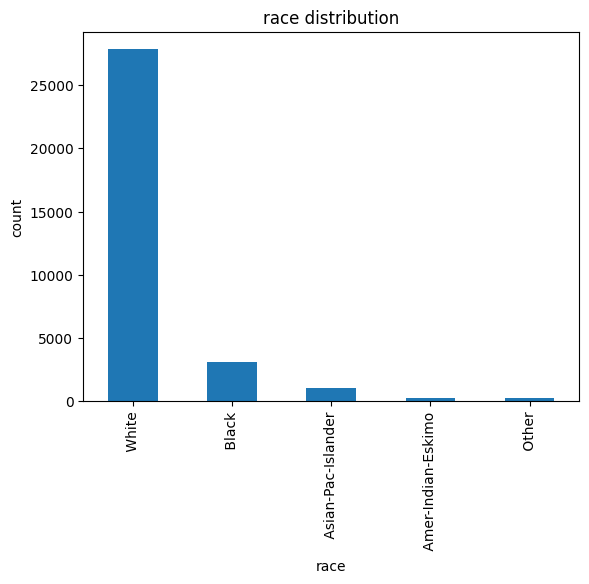

In [177]:
print(df[' race'].unique())
print(df[' race'].value_counts())
df[' race'].value_counts().plot(kind='bar')
plt.xlabel('race')
plt.ylabel('count')
plt.title('race distribution')
#plt.xticks(rotation=45)
plt.show()

[' Male' ' Female']
 sex
Male      21790
Female    10771
Name: count, dtype: int64


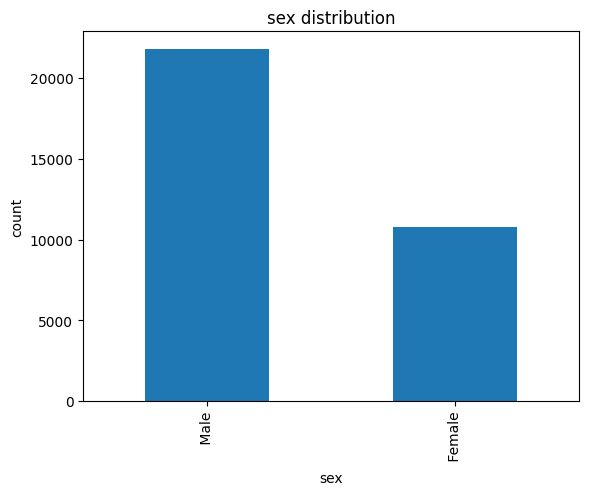

In [178]:
print(df[' sex'].unique())
print(df[' sex'].value_counts())
df[' sex'].value_counts().plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('count')
plt.title('sex distribution')
#plt.xticks(rotation=45)
plt.show()

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
 native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
Chin

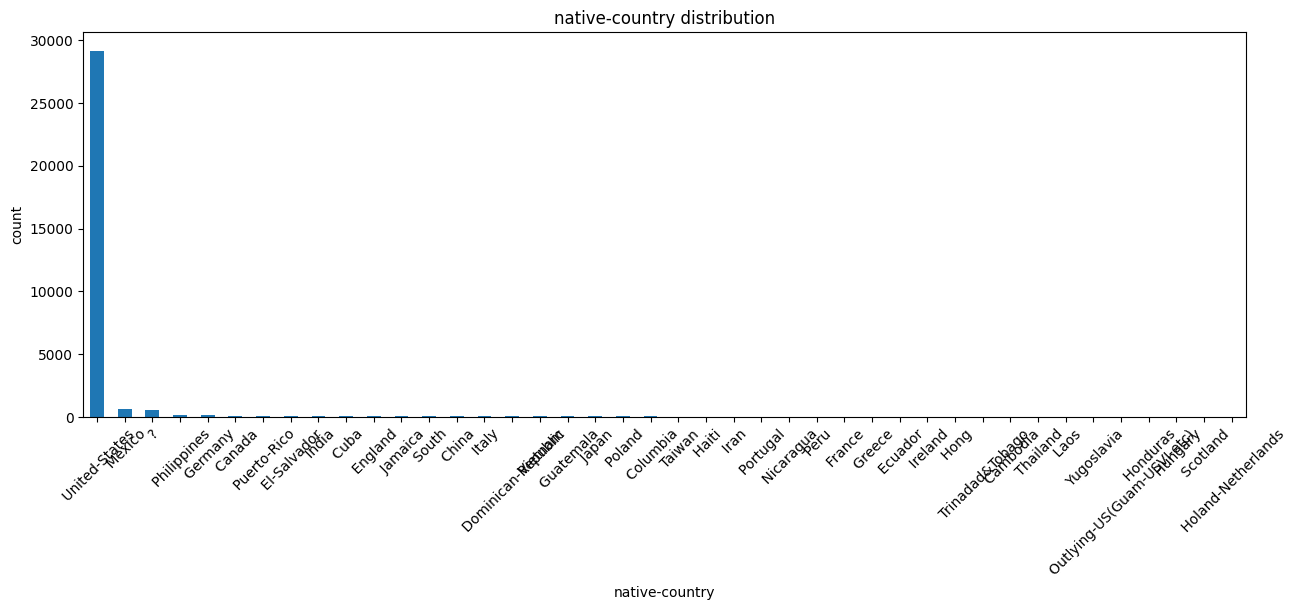

In [179]:
print(df[' native-country'].unique())
print(df[' native-country'].value_counts())
plt.figure(figsize=(15,5))
df[' native-country'].value_counts().plot(kind='bar')
plt.xlabel('native-country')
plt.ylabel('count')
plt.title('native-country distribution')
plt.xticks(rotation=45)
plt.show()

[' <=50K' ' >50K']
 salary
<=50K    24720
>50K      7841
Name: count, dtype: int64


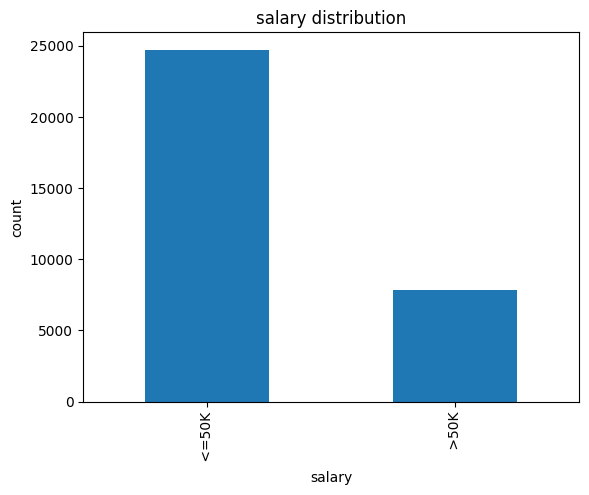

In [180]:
print(df[' salary'].unique())
print(df[' salary'].value_counts())
df[' salary'].value_counts().plot(kind='bar')
plt.xlabel('salary')
plt.ylabel('count')
plt.title('salary distribution')
#plt.xticks(rotation=45)
plt.show()

In [181]:
# Categorical Encoding
Categorical

[' workclass',
 ' education',
 ' marital-status',
 ' occupation',
 ' relationship',
 ' race',
 ' sex',
 ' native-country',
 ' salary']

In [182]:
df[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [183]:
df[' workclass'] = df[' workclass'].map({' State-gov' : 1,' Self-emp-not-inc' : 2,' Private' : 3 , ' Federal-gov' :  4 , ' Local-gov' : 5 , ' ?' : 6 , ' Self-emp-inc' : 7 , ' Without-pay' : 8 , ' Never-worked' : 9}).astype(int)
print(df[' workclass'])

0        1
1        2
2        3
3        3
4        3
        ..
32556    3
32557    3
32558    3
32559    3
32560    7
Name:  workclass, Length: 32561, dtype: int64


In [184]:
df[' education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [185]:
df[' education'] = df[' education'].map({' Bachelors' : 1 , ' HS-grad' : 2 , ' 11th' : 3 , ' Masters' : 4 , ' 9th' : 5 ,
       ' Some-college' : 6 , ' Assoc-acdm' : 7 , ' Assoc-voc' : 8 , ' 7th-8th' : 9 ,
       ' Doctorate' : 10 , ' Prof-school' : 11 , ' 5th-6th' : 12 , ' 10th' : 13 , ' 1st-4th' : 14 ,
       ' Preschool' : 15 , ' 12th' : 16 }).astype(int)
print(df[' education'])

0        1
1        1
2        2
3        3
4        1
        ..
32556    7
32557    2
32558    2
32559    2
32560    2
Name:  education, Length: 32561, dtype: int64


In [186]:
df[' marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [187]:
df[' marital-status'] = df[' marital-status'].map({' Never-married' : 1 , ' Married-civ-spouse' : 2 , ' Divorced' : 3 ,
       ' Married-spouse-absent' : 4 , ' Separated' : 5 , ' Married-AF-spouse' : 6 ,
       ' Widowed' : 7 }).astype(int)
print(df[' marital-status'])

0        1
1        2
2        3
3        2
4        2
        ..
32556    2
32557    2
32558    7
32559    1
32560    2
Name:  marital-status, Length: 32561, dtype: int64


In [188]:
df[' occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [189]:
df[' occupation'] = df[' occupation'].map({' Adm-clerical' : 1 , ' Exec-managerial' : 2 , ' Handlers-cleaners' : 3 ,
       ' Prof-specialty' : 4 , ' Other-service' : 5 , ' Sales' : 6 , ' Craft-repair' : 7 ,
       ' Transport-moving' : 8 , ' Farming-fishing' : 9 , ' Machine-op-inspct' : 10 ,
       ' Tech-support' : 11 , ' ?' : 12 , ' Protective-serv' : 13 , ' Armed-Forces' : 14,
       ' Priv-house-serv' : 15 }).astype(int)
print(df[' occupation'])

0         1
1         2
2         3
3         3
4         4
         ..
32556    11
32557    10
32558     1
32559     1
32560     2
Name:  occupation, Length: 32561, dtype: int64


In [190]:
df[' relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [191]:
df[' relationship'] = df[' relationship'].map({' Not-in-family' : 1 , ' Husband' : 2 , ' Wife' : 3 , ' Own-child' : 4 , ' Unmarried' : 5 ,
       ' Other-relative' : 6 }).astype(int)
print(df[' relationship'])

0        1
1        2
2        1
3        2
4        3
        ..
32556    3
32557    2
32558    5
32559    4
32560    3
Name:  relationship, Length: 32561, dtype: int64


In [192]:
df[' race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [193]:
df[' race'] = df[' race'].map({' White' : 1 , ' Black' : 2 , ' Asian-Pac-Islander' : 3 , ' Amer-Indian-Eskimo' : 4 ,
       ' Other' : 5 }).astype(int)
print(df[' race'])

0        1
1        1
2        1
3        2
4        2
        ..
32556    1
32557    1
32558    1
32559    1
32560    1
Name:  race, Length: 32561, dtype: int64


In [194]:
df[' sex'].unique()

array([' Male', ' Female'], dtype=object)

In [195]:
df[' sex'] = df[' sex'].map({' Male' : 1 , ' Female' : 2 }).astype(int)
print(df[' sex'])

0        1
1        1
2        1
3        1
4        2
        ..
32556    2
32557    1
32558    2
32559    1
32560    2
Name:  sex, Length: 32561, dtype: int64


In [196]:
df[' native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [197]:
df[' native-country'] = df[' native-country'].map({' United-States' : 1 , ' Cuba' : 2 , ' Jamaica' : 3 , ' India' : 4 , ' ?' : 5 , ' Mexico' : 6 ,
       ' South' : 6 , ' Puerto-Rico' : 7 , ' Honduras' : 8 , ' England' : 9 , ' Canada' : 10 ,
       ' Germany' : 11 , ' Iran' : 12 , ' Philippines' : 13 , ' Italy' : 14 , ' Poland' : 15 ,
       ' Columbia' : 16 , ' Cambodia' : 17 , ' Thailand' : 18 , ' Ecuador' : 19 , ' Laos' : 20 ,
       ' Taiwan' : 21 , ' Haiti' : 22 , ' Portugal' : 23 , ' Dominican-Republic' : 24 ,
       ' El-Salvador' : 25 , ' France' : 26 , ' Guatemala' : 27 , ' China' : 28 , ' Japan' : 29 ,
       ' Yugoslavia' : 30 , ' Peru' : 31 , ' Outlying-US(Guam-USVI-etc)' : 32 , ' Scotland' : 33 ,
       ' Trinadad&Tobago' : 34 , ' Greece' : 35 , ' Nicaragua' : 36 , ' Vietnam' : 37 , ' Hong' : 38 ,
       ' Ireland' : 39 , ' Hungary' : 40 , ' Holand-Netherlands' : 42 }).astype(int)
print(df[' native-country'])

0        1
1        1
2        1
3        1
4        2
        ..
32556    1
32557    1
32558    1
32559    1
32560    1
Name:  native-country, Length: 32561, dtype: int64


In [198]:
df[' salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [199]:
salary_set = df[' salary'].map({' <=50K' : 1 , ' >50K' : 2 }).astype(int)
print(salary_set)

0        1
1        1
2        1
3        1
4        1
        ..
32556    1
32557    2
32558    1
32559    1
32560    2
Name:  salary, Length: 32561, dtype: int64


In [200]:
pip install scikit-learn

In [201]:
# Train - Test Split
from sklearn.model_selection import train_test_split
x = df.iloc[ : , :-1 ]
y = df.iloc[ : , -1]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .2 ,random_state = 42)

In [202]:
x_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
5514,33.0,5,198183.0,1,13.0,1,4,1,1,2,0,0,50.0,1
19777,36.0,3,86459.0,8,11.0,2,2,2,1,1,0,1887,50.0,1
10781,58.0,2,203039.0,5,5.0,5,7,1,1,1,0,0,40.0,1
32240,21.0,3,180190.0,8,11.0,2,9,2,1,1,0,0,46.0,1
9876,27.0,3,279872.0,6,10.0,3,5,1,1,1,0,0,40.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47.0,3,359461.0,1,13.0,2,7,2,1,1,0,0,40.0,1
5390,31.0,3,147215.0,16,8.0,3,5,5,1,2,0,0,32.5,1
860,18.0,3,216284.0,3,7.0,1,1,4,1,2,0,0,32.5,1
15795,50.0,2,54261.0,2,9.0,2,9,2,1,1,0,0,52.5,1


In [208]:
# Applying Standardization Using standard scalar
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(x_train)
X_test_sc = sc.transform(x_test)
X_train_sc = pd.DataFrame(X_train_sc,columns=x.columns)
X_test_sc = pd.DataFrame(X_test_sc,columns=x.columns)

In [209]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(X_train_sc,y_train)
print("Training Score :",knn_clf.score(X_train_sc,y_train))
print("Test Score :",knn_clf.score(X_test_sc,y_test))

Training Score : 0.8654791154791155
Test Score : 0.8354061108552127


In [210]:
from sklearn.svm import SVC
svc_clf=SVC()
svc_clf.fit(X_train_sc,y_train)
print("Training Score :",svc_clf.score(X_train_sc,y_train))
print("Test Score :",svc_clf.score(X_test_sc,y_test))

Training Score : 0.8544993857493858
Test Score : 0.852141870105942


In [211]:
from sklearn.ensemble import RandomForestClassifier
rnd = RandomForestClassifier(n_estimators=100,criterion='entropy',max_features=2)
rnd.fit(X_train_sc,y_train)
print("Training Score :",rnd.score(X_train_sc,y_train))
print("Test Score :",rnd.score(X_test_sc,y_test))

Training Score : 1.0
Test Score : 0.860586519269154


In [212]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_sc,y_train)
print("Training Score :",lg.score(X_train_sc,y_train))
print("Test Score :",lg.score(X_test_sc,y_test))

Training Score : 0.8257831695331695
Test Score : 0.8303393213572854
